In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.metrics import confusion_matrix

plt.style.use("seaborn-v0_8")
sns.set_context("talk")

print("Libraries loaded.")

Libraries loaded.


In [2]:
train_df = pd.read_csv("/app/output/train.csv", encoding="utf-8-sig")
val_df   = pd.read_csv("/app/output/val.csv", encoding="utf-8-sig")
test_df  = pd.read_csv("/app/output/test.csv", encoding="utf-8-sig")

print(f"Train size: {len(train_df)}")
print(f"Val size:   {len(val_df)}")
print(f"Test size:  {len(test_df)}")

Train size: 2995
Val size:   374
Test size:  375


In [3]:
label_dist = pd.DataFrame({
    "Train": train_df["label"].value_counts().sort_index(),
    "Val":   val_df["label"].value_counts().sort_index(),
    "Test":  test_df["label"].value_counts().sort_index()
})

label_dist

,Train,Val,Test
label,,,
1,160,20,20
2,360,45,45
3,651,81,82
4,897,112,112
5,927,116,116


In [4]:
(label_dist.div(label_dist.sum()) * 100).round(2)

,Train,Val,Test
label,,,
1,5.34,5.35,5.33
2,12.02,12.03,12.00
3,21.74,21.66,21.87
4,29.95,29.95,29.87
5,30.95,31.02,30.93


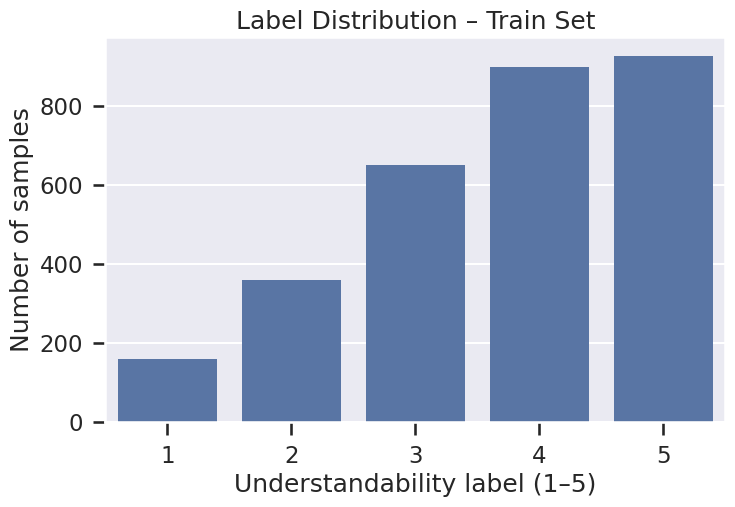

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x=label_dist.index, y=label_dist["Train"])
plt.title("Label Distribution – Train Set")
plt.xlabel("Understandability label (1–5)")
plt.ylabel("Number of samples")
plt.show()

In [6]:
max_count = label_dist["Train"].max()
imbalance_ratio = (max_count / label_dist["Train"]).round(2)

imbalance_ratio

label
1    5.79
2    2.58
3    1.42
4    1.03
5    1.00
Name: Train, dtype: float64

In [7]:
train_df["word_count"] = train_df["text"].str.split().apply(len)

stats = train_df.groupby("label")["word_count"].agg(["mean", "median", "std"]).round(1)
stats

,mean,median,std
label,,,
1,98.0,80.0,77.7
2,90.0,64.0,130.8
3,62.1,48.0,59.1
4,45.7,39.0,33.2
5,25.9,22.0,19.3


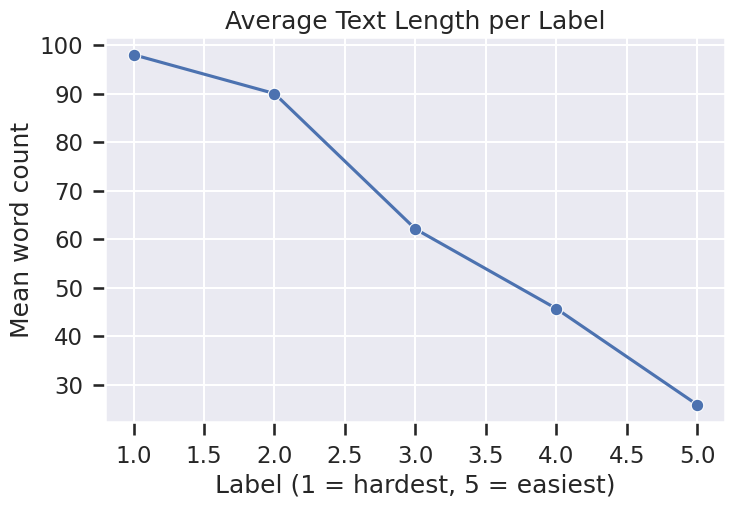

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(x=stats.index, y=stats["mean"], marker="o")
plt.title("Average Text Length per Label")
plt.xlabel("Label (1 = hardest, 5 = easiest)")
plt.ylabel("Mean word count")
plt.show()

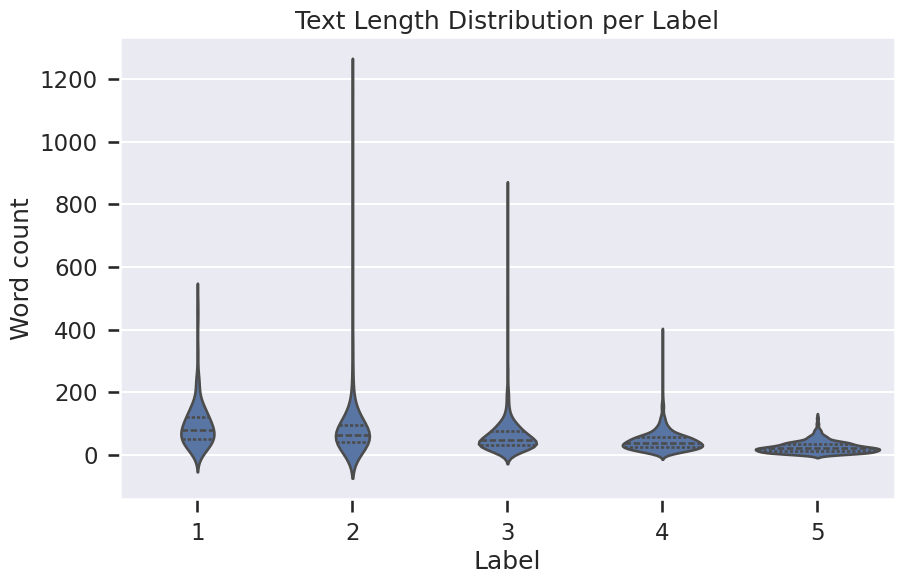

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(data=train_df, x="label", y="word_count", inner="quartile")
plt.title("Text Length Distribution per Label")
plt.xlabel("Label")
plt.ylabel("Word count")
plt.show()

In [10]:
def ordinal_distance(y_true, y_pred):
    return np.abs(np.array(y_true) - np.array(y_pred))

# Simulated example: perfect vs off-by-one
example_true = [1, 2, 3, 4, 5]
example_pred = [2, 2, 3, 3, 5]

ordinal_distance(example_true, example_pred)

array([1, 0, 0, 1, 0])

In [11]:
chi2, p, dof, expected = chi2_contingency(label_dist.fillna(0))

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.6f}")

Chi-square statistic: 0.01
p-value: 1.000000


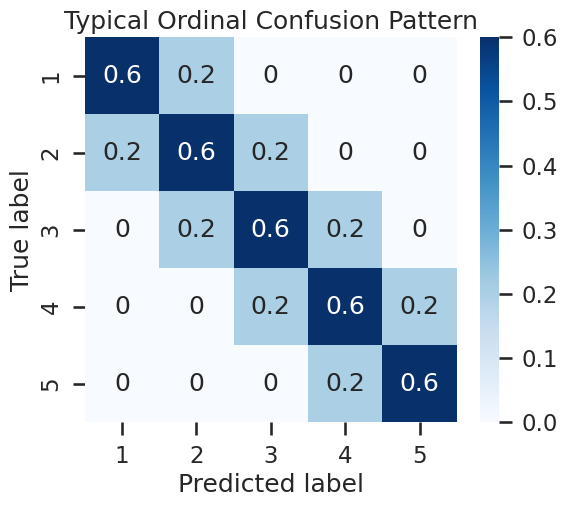

In [12]:
labels = [1, 2, 3, 4, 5]

cm_dummy = np.zeros((5,5))
for i in range(5):
    cm_dummy[i, i] = 0.6
    if i > 0:
        cm_dummy[i, i-1] = 0.2
    if i < 4:
        cm_dummy[i, i+1] = 0.2

plt.figure(figsize=(6,5))
sns.heatmap(cm_dummy, annot=True, cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Typical Ordinal Confusion Pattern")
plt.show()